Importing Required Libraries for the project

In [1]:
import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import missingno
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import zscore

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import lightgbm as lgb

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,f1_score,roc_curve,auc

In [2]:
# reading the input csv file
data = pd.read_csv(r'C:\Users\Asus\Desktop\final evaluation\hr analytics\WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
#checking the top data
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

Checking null value in dataset 

In [4]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

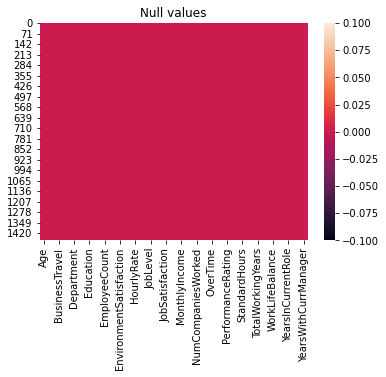

In [5]:
sns.heatmap(data.isnull())
plt.title('Null values')
plt.show()

there isn't any null value present in the dataset

statistical summary of the data

In [3]:
data.describe().T

count          mean          std     min      25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.00   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.00   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.00   
Education                 1470.0      2.912925     1.024165     1.0     2.00   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.00   
EmployeeNumber            1470.0   1024.865306   602.024335     1.0   491.25   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.00   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.00   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.00   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.00   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.00   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.00   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.00   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.00   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.00   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.00   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.00   
StandardHours             1470.0     80.000000     0.000000    80.0    80.00   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.00   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.00   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.00   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.00   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.00   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.00   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.00   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.00   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EmployeeNumber             1020.5   1555.75   2068.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

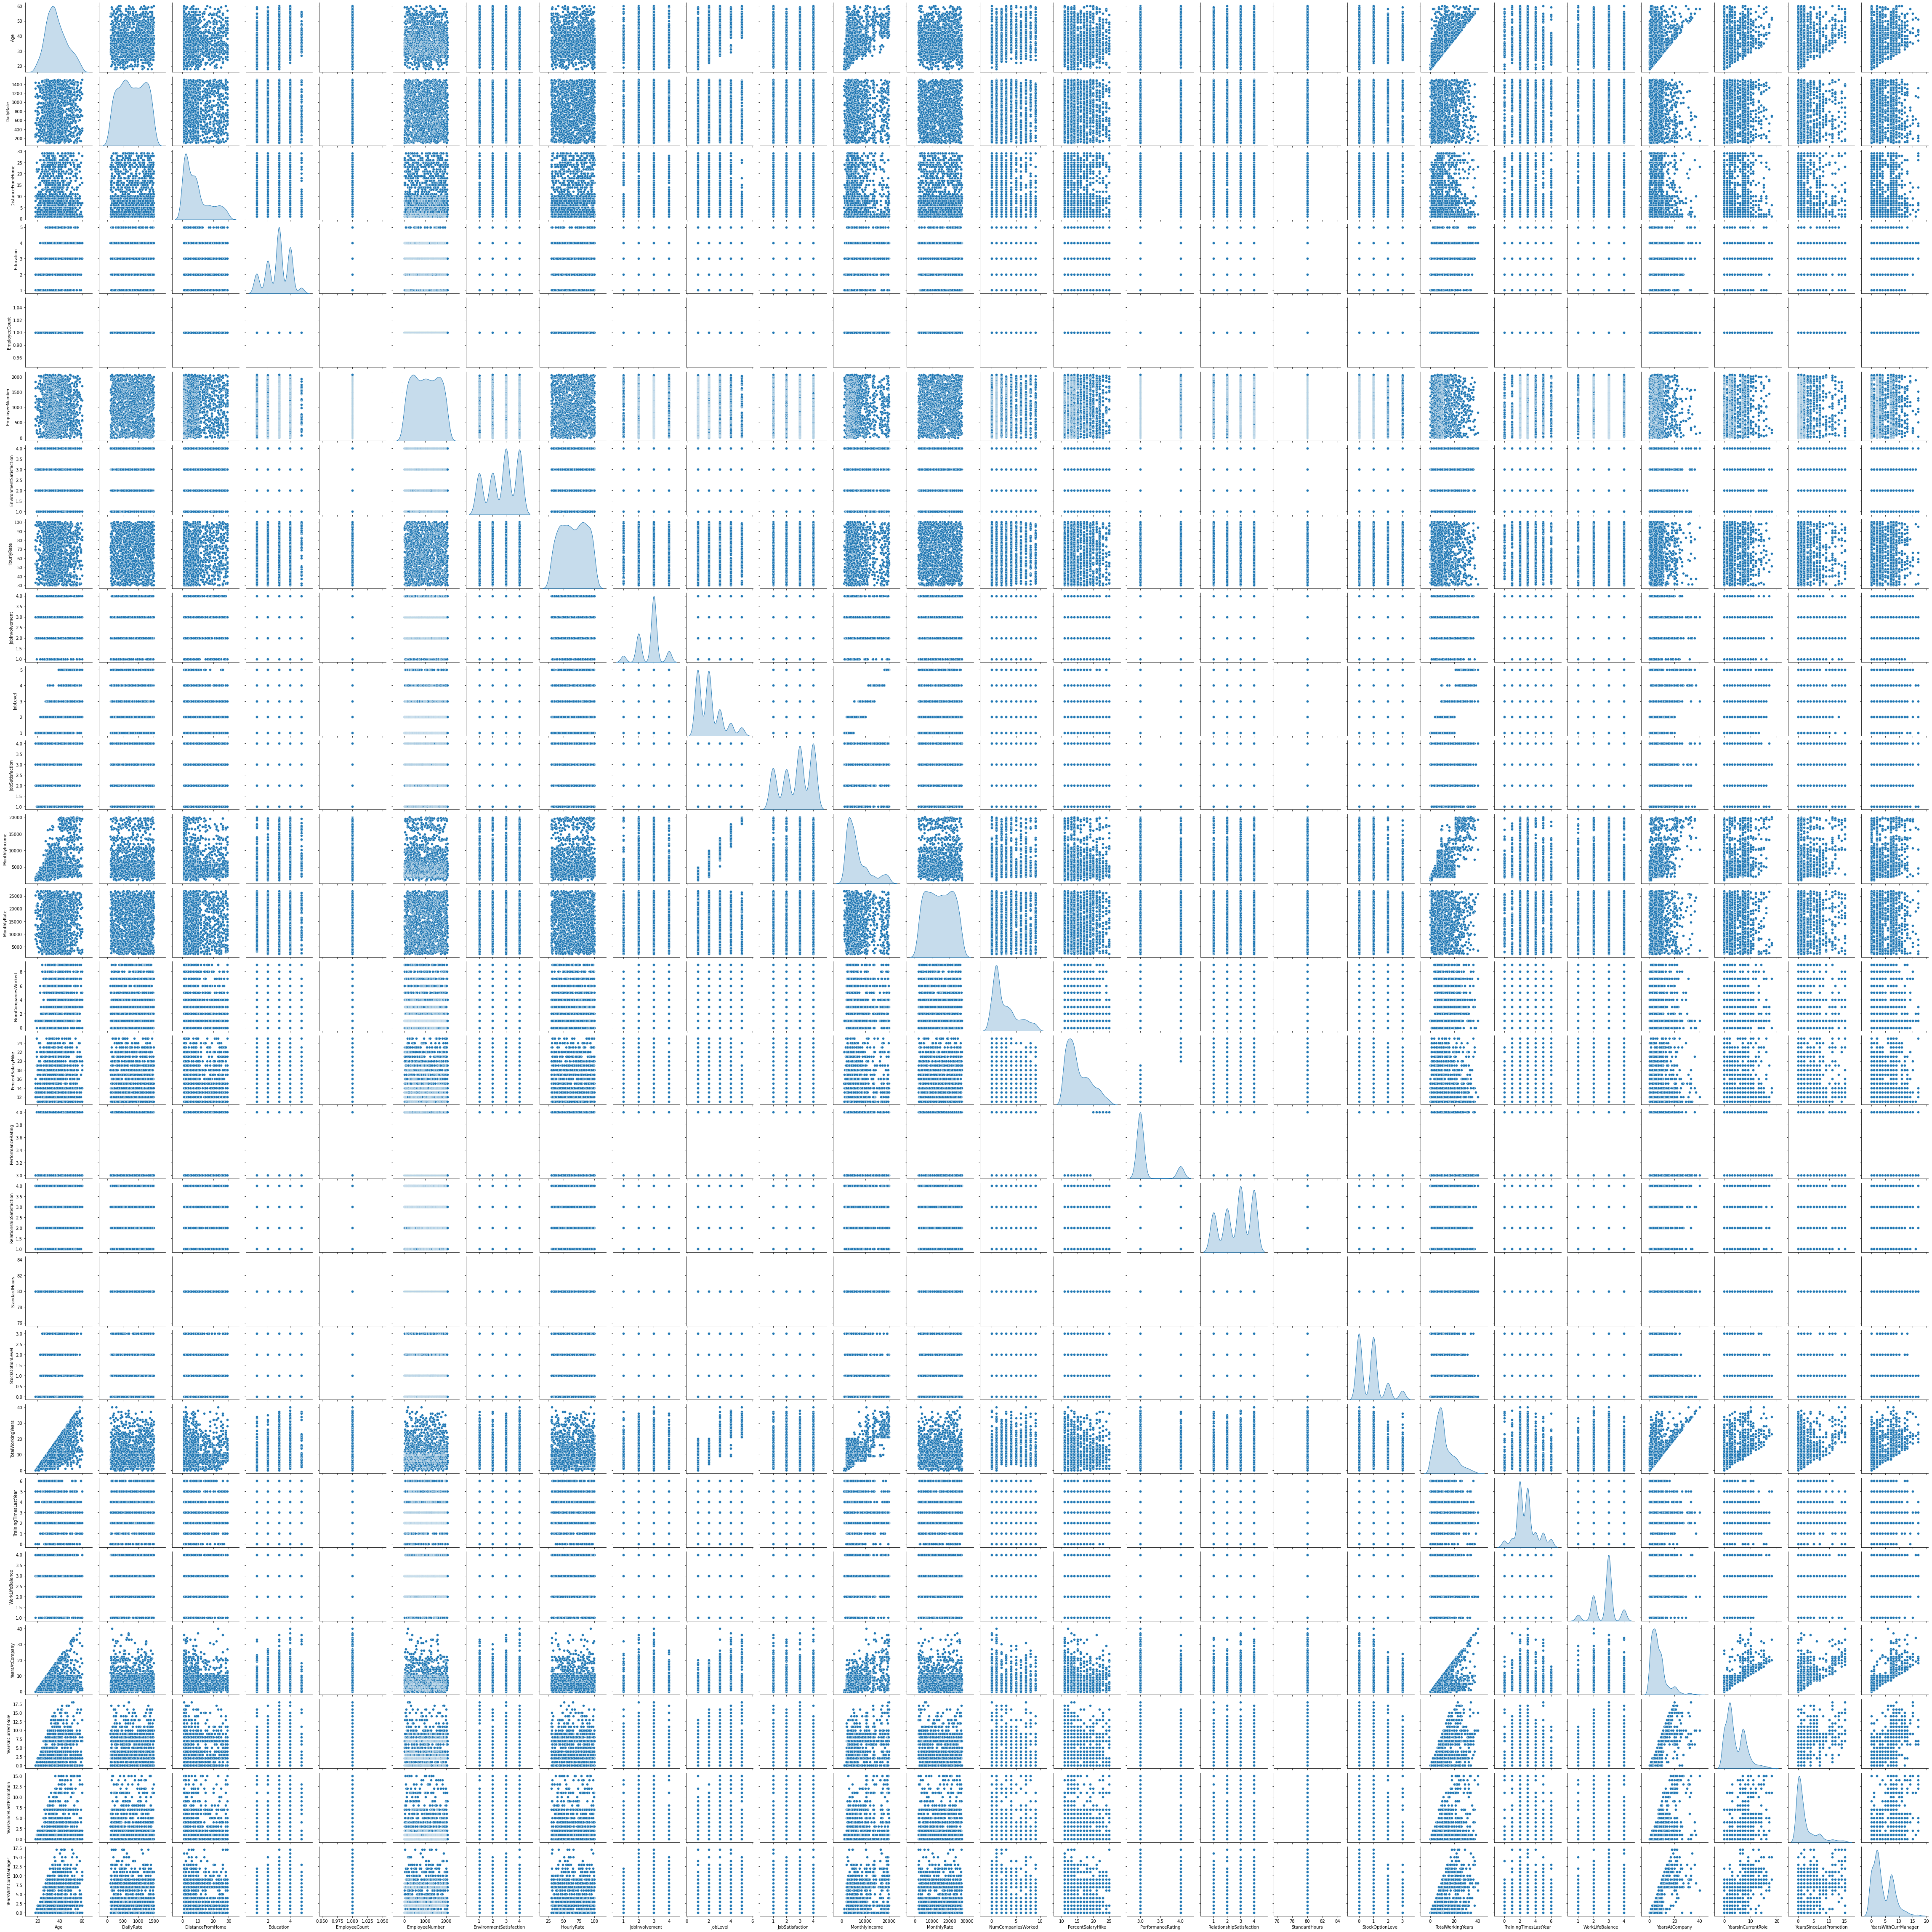

In [7]:
#creating scatterplots between various features to understand relasionship between them
sns.pairplot(data,diag_kind="kde")

collinearity need to be identified

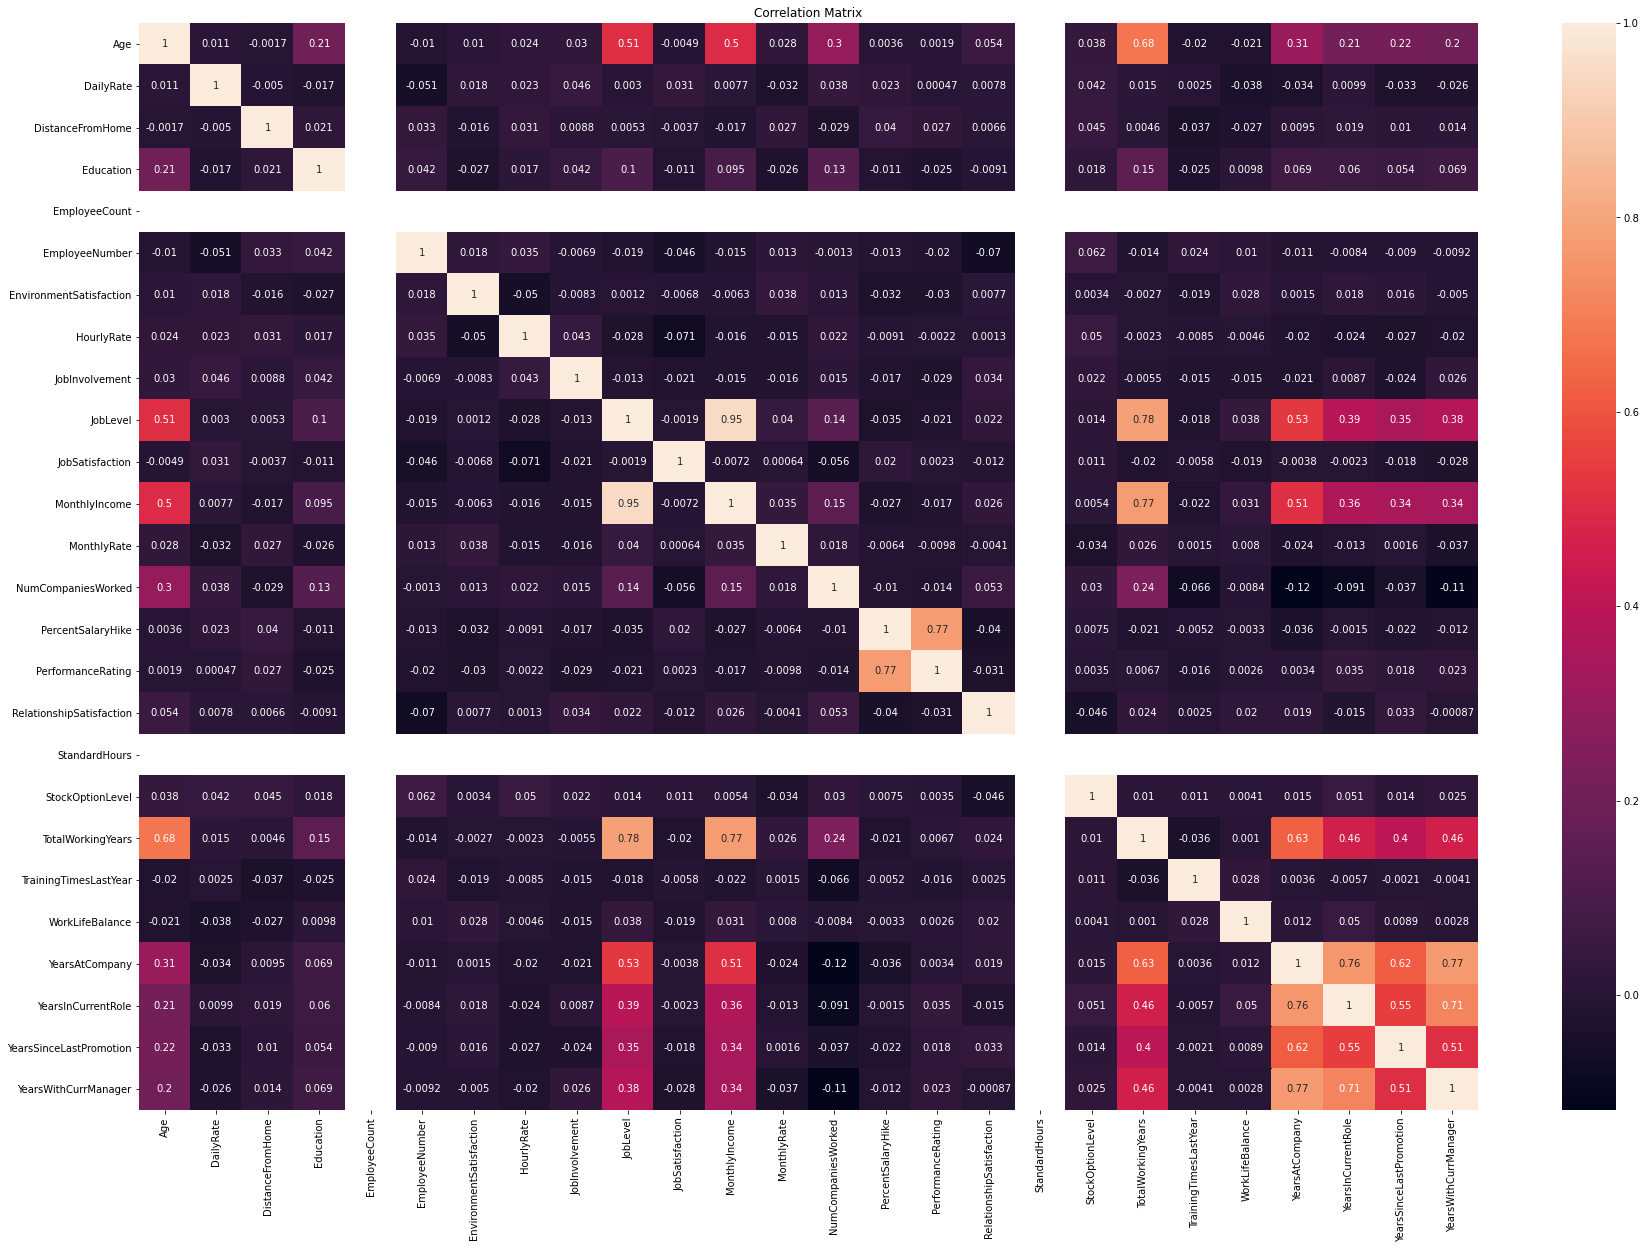

In [11]:
corr_mat=data.corr()
#size of the canvas
plt.figure(figsize=[30,20])
#plot the correlation matrix
sns.heatmap(corr_mat,annot=True)
plt.title('Correlation Matrix')
plt.show()

-From heat map we can say that the col MonthlyIncome is totally arround 95% depends on JobLevelOfEmployee.

-Columns of Age, JobLevel, MonthlyIncome, TotalWorkingYears, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrentManager are showing some variation to each other.

-Other features are not showing any strong relation between them.





.

Checking the column data type is correct or not and removing

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

We can see that currently there are 26 columns that have integer datatype and 9 columns that have object datatype. 

In [4]:
# checking unique values in perticular columns

print(data['EmployeeCount'].unique(),' employee count')
print(data['StandardHours'].unique(), ' standard hours')

[1]  employee count
[80]  standard hours


In [5]:
data.drop(["EmployeeCount", "EmployeeNumber", "StandardHours"], axis=1, inplace=True)

-Dropping all the unwanted columns.

EmployeeCount - In this coloumn the data is not much of help, cuz it contains only.

EmployeeNumber - A unique number of each employee that has to do with attrition.

StandardHours - It doesn't depicts any reasonable data, it's a standardised time for each employee.

updated

In [6]:
object_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'O':
        object_datatype.append(x)
object_datatype

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [7]:
integer_datatype = []
for x in data.dtypes.index:
    if data.dtypes[x] == 'int64':
        integer_datatype.append(x)
integer_datatype

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

we reduced it to 23 int datatype

In [8]:
data.nunique().to_frame("Unique Values")

Unique Values
Age                                  43
Attrition                             2
BusinessTravel                        3
DailyRate                           886
Department                            3
DistanceFromHome                     29
Education                             5
EducationField                        6
EnvironmentSatisfaction               4
Gender                                2
HourlyRate                           71
JobInvolvement                        4
JobLevel                              5
JobRole                               9
JobSatisfaction                       4
MaritalStatus                         3
MonthlyIncome                      1349
MonthlyRate                        1427
NumCompaniesWorked                   10
Over18                                1
OverTime                              2
PercentSalaryHike                    15
PerformanceRating                     2
RelationshipSatisfaction              4
StockOptionLevel                      4
TotalWorkingYears                    40
TrainingTimesLastYear                 7
WorkLifeBalance                       4
YearsAtCompany                       37
YearsInCurrentRole                   19
YearsSinceLastPromotion              16
YearsWithCurrManager                 18

Categorical Atributes

In [9]:
# Checking values counts for each categorical columns
for col in object_datatype:
    print('\n')
    print('==================',col,'==================')
    print(data[col].value_counts())



================== Attrition ==================
No     1233
Yes     237
Name: Attrition, dtype: int64


================== BusinessTravel ==================
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


================== Department ==================
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64


================== EducationField ==================
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64


================== Gender ==================
Male      882
Female    588
Name: Gender, dtype: int64


================== JobRole ==================
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager

# Visualization

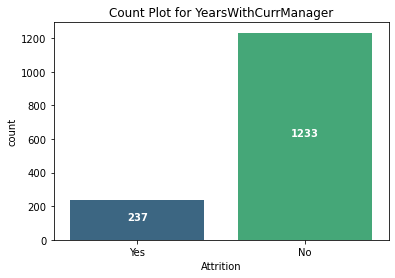

In [10]:
#Checking target feature Attrition using countplot
ax = sns.countplot(data['Attrition'], palette="viridis")
v = data['Attrition'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,v[i.get_text()]/2,v[i.get_text()],horizontalalignment="center",fontweight='bold',color='w')
    k += 1
    
plt.title(f"Count Plot for {x}")
plt.show()

-Majority of observations are for No Attrition in dataset.

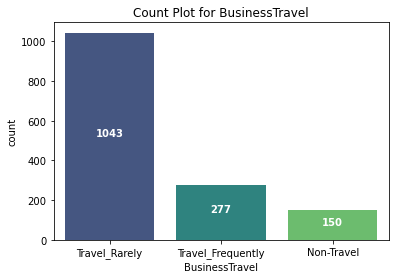

In [85]:
#Checking feature BusinessTravel using countplot
ax = sns.countplot(data['BusinessTravel'], palette="viridis")
val = data['BusinessTravel'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1
    
plt.title(f"Count Plot for BusinessTravel")
plt.show()

-Majority of observations are for feature Travel_Rarely.

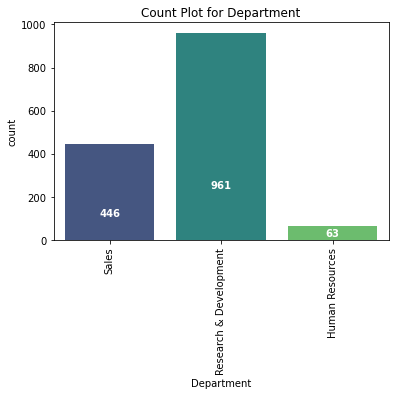

In [97]:
#Checking feature Department using countplot
ax = sns.countplot(data['Department'], palette="viridis")
val = data['Department'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/4,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.xticks(rotation=90)
plt.title(f"Count Plot for Department")
plt.show()

-Majority of observations are for feature Research & Development.

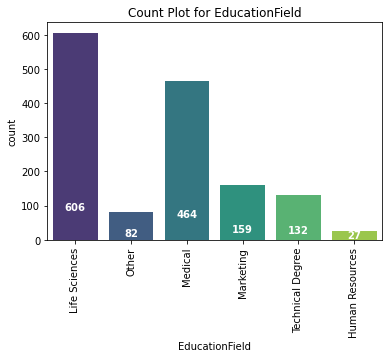

In [103]:
#Checking feature EducationField using countplot
ax = sns.countplot(data['EducationField'], palette="viridis")
val = data['EducationField'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/7,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.xticks(rotation=90)
plt.title(f"Count Plot for EducationField")
plt.show()

-Maximum number of observations are from LifeScience with total of 606 observations.

-Minimum number of observations are from Human Resources with total of 27 observations.

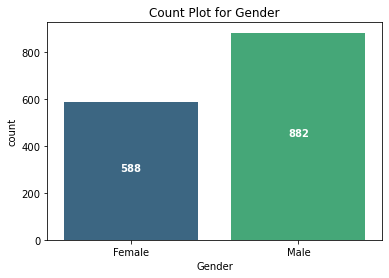

In [96]:
#Checking feature Gender using countplot
x = 'Gender'
ax = sns.countplot(data['Gender'], palette="viridis")
val = data['Gender'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.title(f"Count Plot for {x}")
plt.show()

-Majority of observations are from Gender Male with 882 in total.
-Observation for Gender Female is 588.

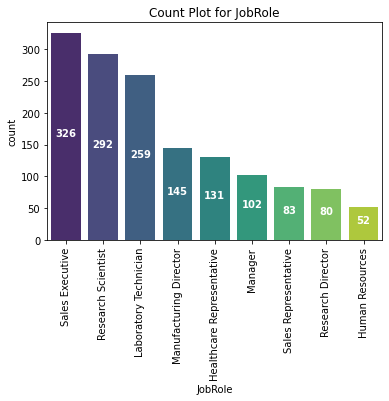

In [101]:
#Checking feature JobRole using countplot
ax = sns.countplot(data['JobRole'], palette="viridis")
val = data['JobRole'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.xticks(rotation=90)
plt.title(f"Count Plot for JobRole")
plt.show()

-Maximum number of observations are for Sales Executive with 326 observations.
-Minimum number of observations are for Human Resources with 52 observations.

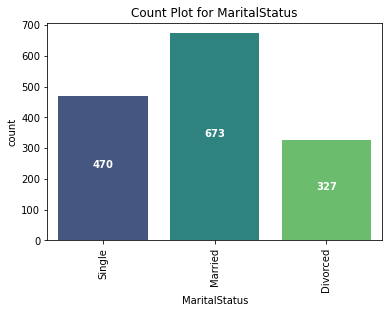

In [106]:
#Checking feature MaritalStatus using countplot
x = 'MaritalStatus'
ax = sns.countplot(data['MaritalStatus'], palette="viridis")
val = data['MaritalStatus'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.xticks(rotation=90)
plt.title(f"Count Plot for MaritalStatus")
plt.show()

-Majority of observations are for Married with 673 observations.

-Minority of observations are for Divorced with 327 observations.

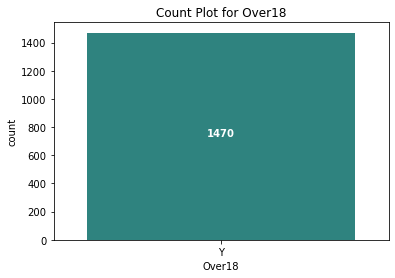

In [116]:
#Checking feature Over18 using countplot
ax = sns.countplot(data['Over18'], palette="viridis")
val = data['Over18'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.title(f"Count Plot for Over18")
plt.show()

-It's also not much usefull column cuz ibm has it own guildline of not hiring below 18

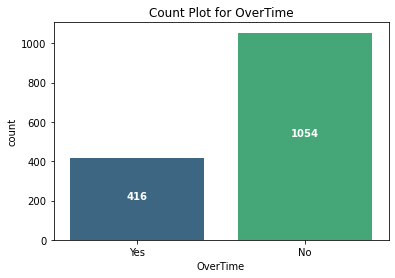

In [113]:
#Checking feature OverTime using countplot
ax = sns.countplot(data['OverTime'], palette="viridis")
val = data['OverTime'].value_counts()
k=0
for i in ax.get_xticklabels():
    ax.text(k,val[i.get_text()]/2,val[i.get_text()],fontweight='bold',horizontalalignment='center',color='w')
    k+=1

plt.title(f"Count Plot for OverTime")
plt.show()

-Majority of observations are for No OverTime with 1054 observations.

# Bivariate analysis

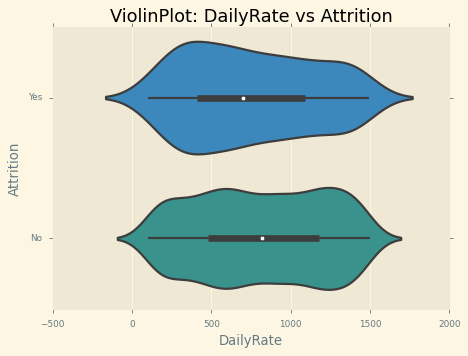

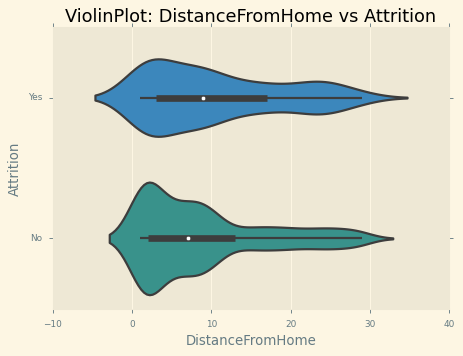

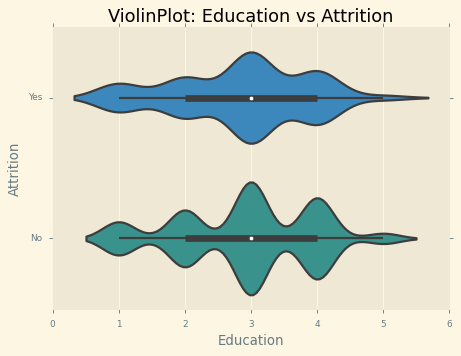

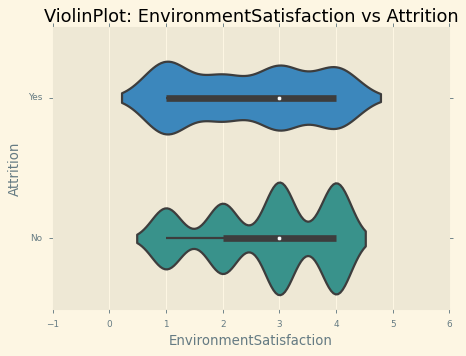

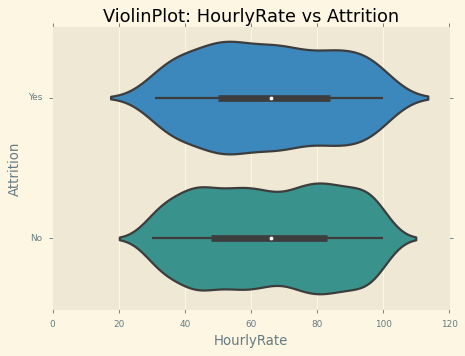

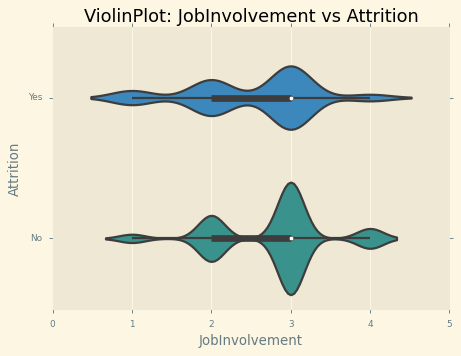

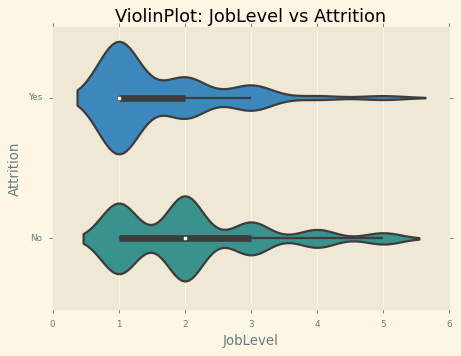

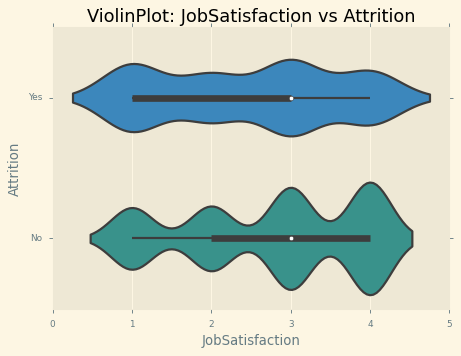

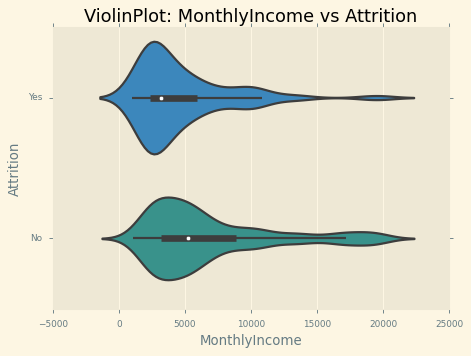

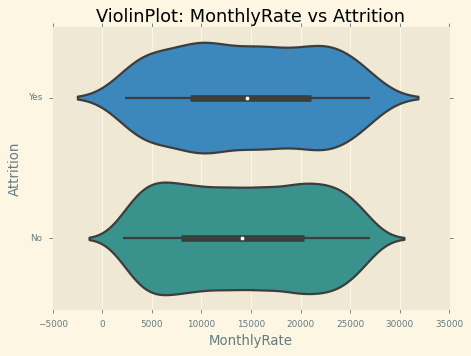

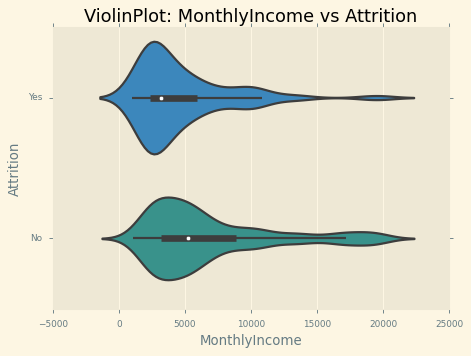

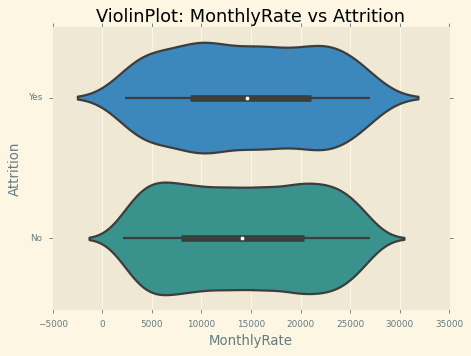

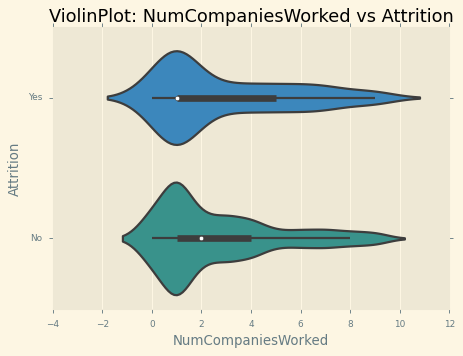

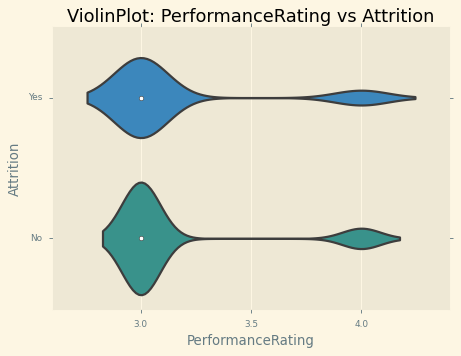

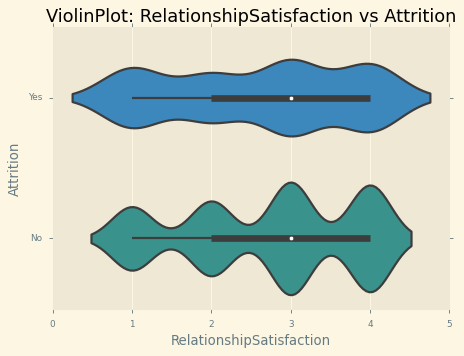

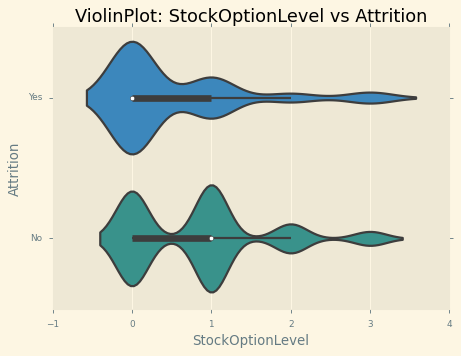

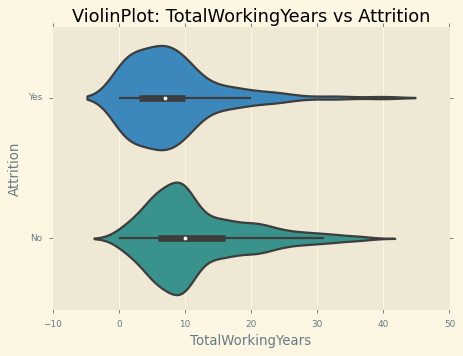

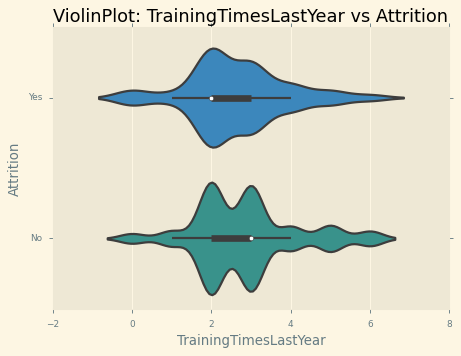

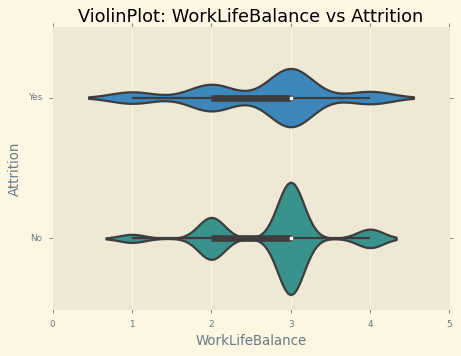

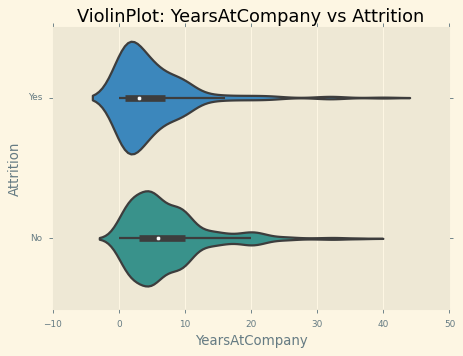

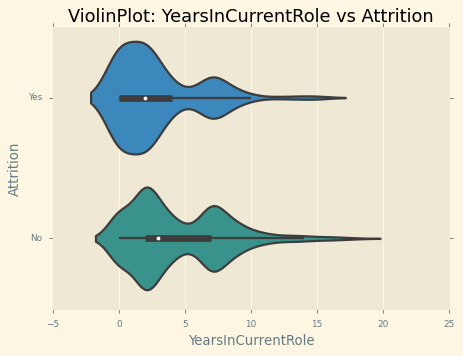

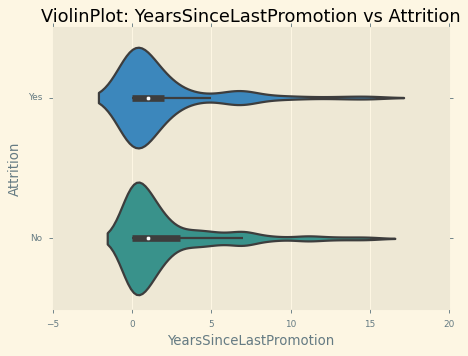

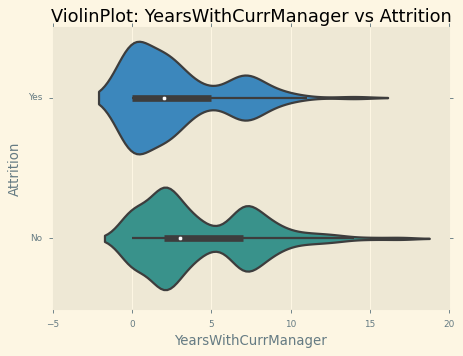

In [235]:
col_nm=['DailyRate', 'DistanceFromHome','Education','EnvironmentSatisfaction','HourlyRate','JobInvolvement','JobLevel','JobSatisfaction','MonthlyIncome','MonthlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PerformanceRating','RelationshipSatisfaction','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']
for x in data[col_nm]:
    y='Attrition'
    ax=sns.violinplot(x,y,data=data)
    plt.title(f"ViolinPlot: {x} vs {y}")
    plt.show()
#'TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'

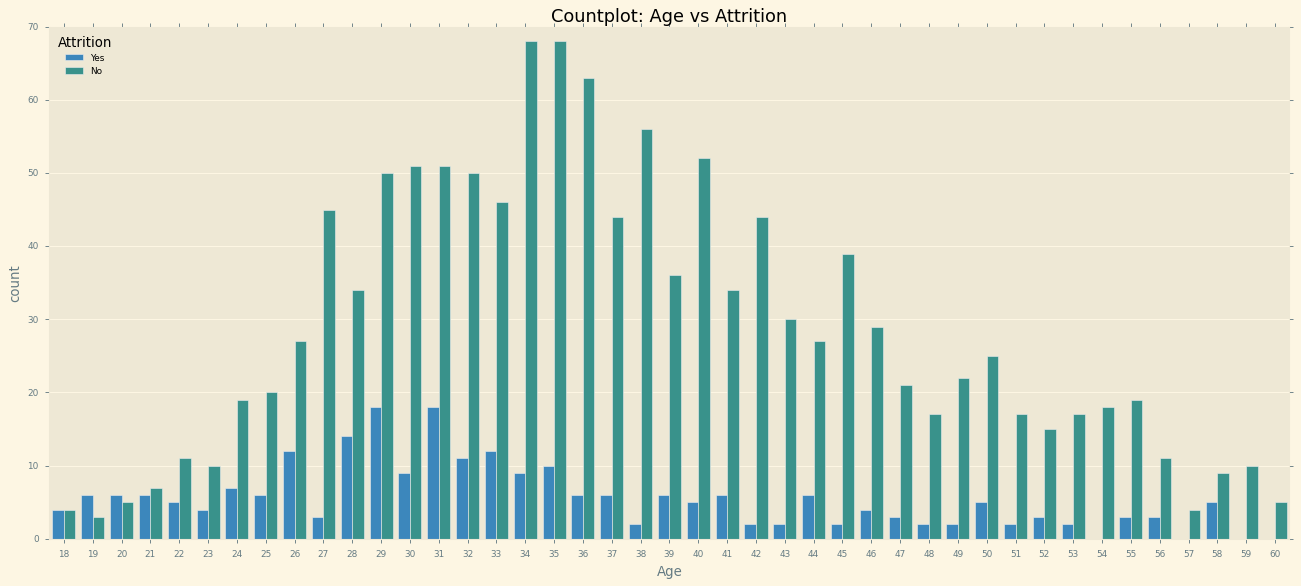

In [232]:
#diffrence between Age and Attrition using countplot.
x = 'Age'
y='Attrition'
plt.figure(figsize=(20,8))
sns.countplot(x,hue=y,data=data)
plt.title(f"Countplot: {x} vs {y}")
plt.show()

employees whose age group is between 27 & 42 has highest tendency to job change

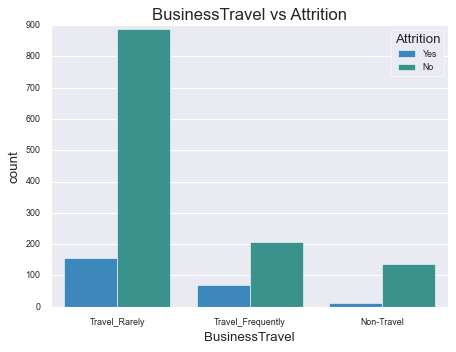

In [242]:
#diffrence between BusinessTravel and Attrition

sns.set_style('darkgrid')
plt.title('BusinessTravel vs Attrition',fontsize=15)
sns.countplot(data['BusinessTravel'],hue='Attrition',data=data);

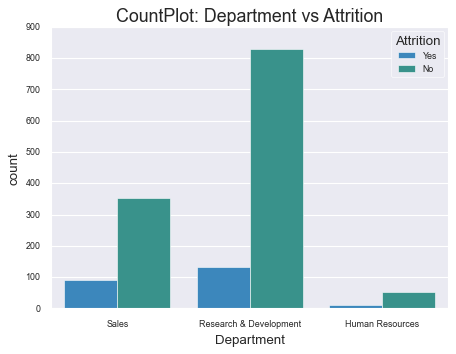

In [244]:
#diffrence between Department and Attrition
x='Department'
y='Attrition'
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

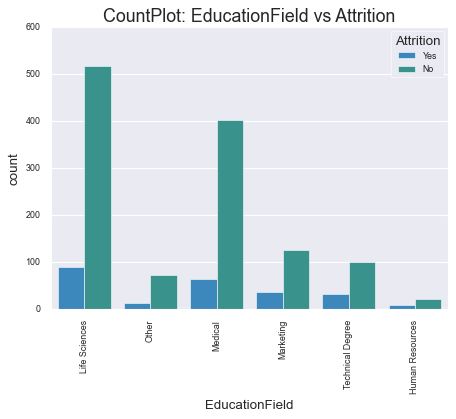

In [260]:
#diffrence between EducationField and Attrition
x='EducationField'
y='Attrition'
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

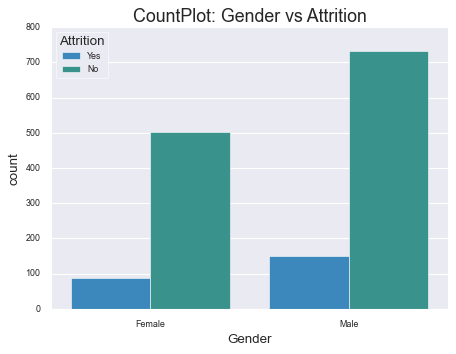

In [258]:
#diffrence between Gender and Attrition
x='Gender'
y='Attrition'
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

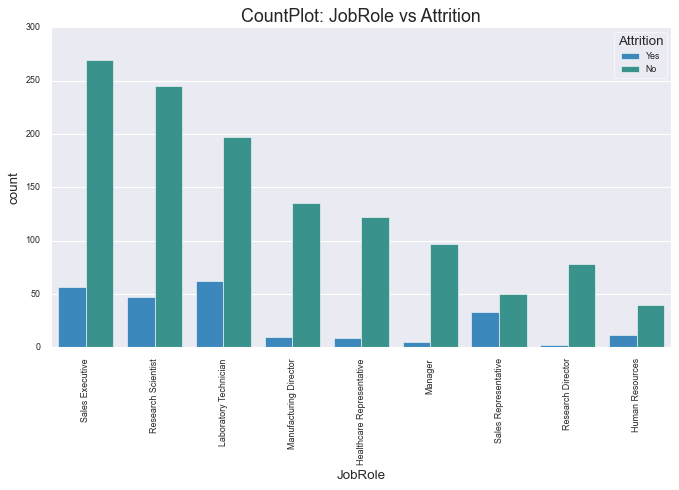

In [256]:
#diffrence between JobRole and Attrition
x='JobRole'
y='Attrition'
plt.figure(figsize=(10,5))
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.xticks(rotation=90)
plt.show()

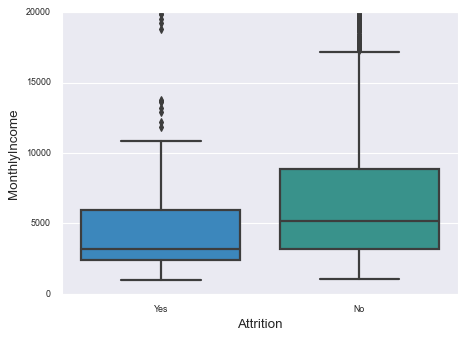

In [270]:
#diffrence between MonthlyIncome and Attrition
sns.boxplot(x = "Attrition", y = "MonthlyIncome", data = data)
plt.show()

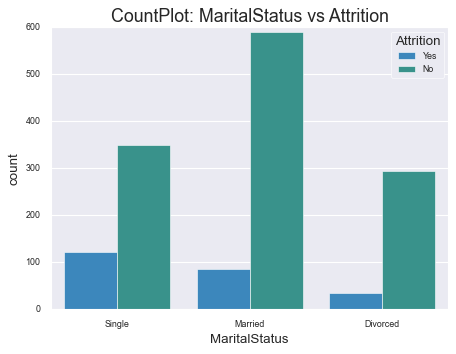

In [262]:
#diffrence between MaritalStatus and Attrition
x='MaritalStatus'
y='Attrition'
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

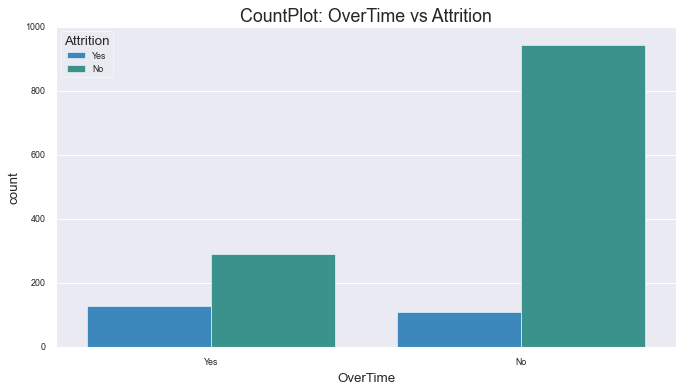

In [263]:
#diffrence between OverTime and Attrition
x='OverTime'
y='Attrition'
plt.figure(figsize=(10,5))
ax=sns.countplot(x,hue=y,data=data)
plt.title(f"CountPlot: {x} vs {y}")
plt.show()

# Data distribution

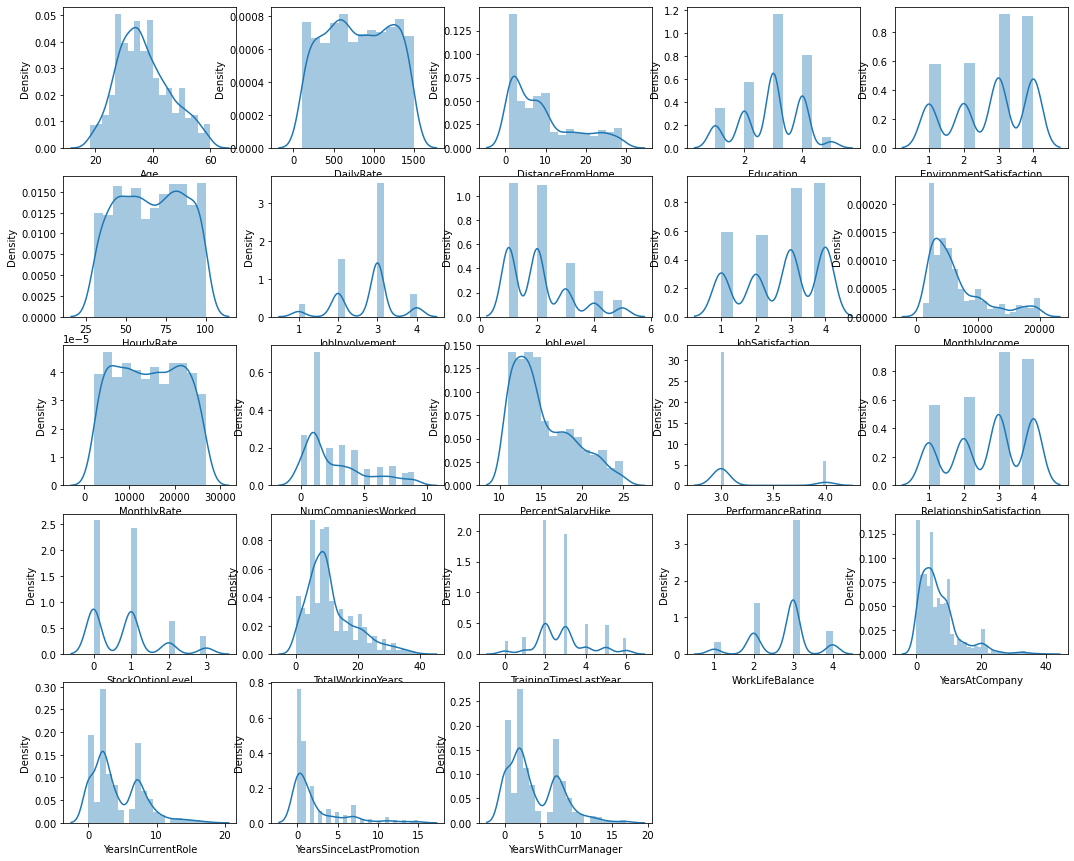

In [12]:
#Checking data distribution using distplot
distri_data=data.select_dtypes(exclude='object')
plt.figure(figsize=(18,15))
plot=1
for col in distri_data:
    if plot<=25:
        plt.subplot(5,5,plot)
        sns.distplot(data[col])
        plt.xlabel(col)
        plot=plot+1
plt.show();

Except Feature Age which is somewhat distributed normally but not in well curve, all other features are not distributed normally which indicates data is heavily skewed and needs to be treated accordingly before sending for model training. 

In [305]:
#Removing Outliers with the help

After removing outliers from the data we are loosing more that 5% data, we can't consider it is safe to remove outliers, we can't take this risk to lose the data.

In [9]:
# At first we will remove outliers from our data. thereafter again will check skewness
# Applying zscore method for removing outliers from skewed features
from scipy import stats
from scipy.stats import zscore
z_score = zscore(data[["DistanceFromHome","JobLevel","MonthlyIncome","NumCompaniesWorked","PercentSalaryHike","PerformanceRating","StockOptionLevel","TotalWorkingYears","TrainingTimesLastYear","WorkLifeBalance","YearsAtCompany","YearsInCurrentRole","YearsSinceLastPromotion","YearsWithCurrManager"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
data = data[filtering_entry]
data

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

In [10]:
#skewing the data
print(data.skew())
print('--------------------------------------------------')
print("Number of feature showing significant skewness: ",len(data.skew().loc[(data.skew())>0.5]))

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome            0.954752
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobSatisfaction            -0.345612
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
YearsAtCompany              1.248623
YearsInCurrentRole          0.726675
YearsSinceLastPromotion     1.756335
YearsWithCurrManager        0.694506
dtype: float64
--------------------------------------------------
Number of feature showing significant skewness:  13


still skewness is there in 13 feature.

In [12]:
# separating tyhe column
x = data.drop(columns = ["Attrition"])
y = data["Attrition"]

In [13]:
#treating skewed data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [16]:
print(x.skew())
print("Number of feature showing significant skewness: ",len(x.skew().loc[(x.skew())>0.5]))

Age                         0.472280
DailyRate                  -0.017078
DistanceFromHome           -0.031570
Education                  -0.289024
EnvironmentSatisfaction    -0.325285
HourlyRate                 -0.030481
JobInvolvement              0.329667
JobLevel                    0.497167
JobSatisfaction            -0.345612
MonthlyIncome               0.318873
MonthlyRate                 0.030596
NumCompaniesWorked          0.101288
PercentSalaryHike           0.496106
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.275912
TotalWorkingYears           0.241110
TrainingTimesLastYear       0.513454
WorkLifeBalance             0.299233
YearsAtCompany             -0.379527
YearsInCurrentRole         -0.390406
YearsSinceLastPromotion     0.695348
YearsWithCurrManager       -0.347018
dtype: float64
Number of feature showing significant skewness:  3


In [17]:
#scaling to standard form
numeric_data = x.select_dtypes(include=[np.number])
numeric_data.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [18]:
#coverting categorical data into numeric values using labelencoder
leb_enc = LabelEncoder()
for i in x.columns:
    if x[i].dtypes == "object":
        x[i] = leb_enc.fit_transform(x[i])

In [19]:
#encode the categorical coloumns using labelencoder
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in object_datatype:
    data[col]=le.fit_transform(data[col])

In [20]:
#target var value count
y.value_counts()

No     1158
Yes     229
Name: Attrition, dtype: int64

In [21]:
#oversampling using SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(x,y)

In [22]:
numerical_data = X.drop(columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [24]:
#taking all numerical features to single standard scale
scaler = StandardScaler()
x_ax_num = scaler.fit_transform(numerical_data)
x_ax_num = pd.DataFrame(x_num,columns=numerical_data.columns)

In [25]:
categorical_data = pd.DataFrame(X,columns = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime'])

In [28]:
#Lets join both categorical data and numerical data of our features
Xx = x_ax_num.join(categorical_data)
Xx

Age  DailyRate  DistanceFromHome  Education  \
0     0.726016   0.823434         -1.702104  -0.737906   
1     1.657117  -1.304546          0.178934  -1.766798   
2     0.260465   1.524142         -1.195018  -0.737906   
3    -0.205085   1.573270         -0.835236   1.319878   
4    -0.903411  -0.497827         -1.195018  -1.766798   
...        ...        ...               ...        ...   
2311  1.191566   0.438174         -1.382072   0.290986   
2312 -1.601737  -0.844303          0.927455  -1.766798   
2313  0.027690  -0.285805          1.014359   1.319878   
2314  1.075179   1.645667         -1.017387   0.290986   
2315 -0.321473   0.109798          0.764834  -0.737906   

      EnvironmentSatisfaction  HourlyRate  JobInvolvement  JobLevel  \
0                   -0.462818    1.505547        0.446636  0.430712   
1                    0.475787   -0.248213       -0.981318  0.430712   
2                    1.414393    1.399258       -0.981318 -0.955731   
3                    1.414393   -0.513934        0.446636 -0.955731   
4                   -1.401424   -1.364242        0.446636 -0.955731   
...                       ...         ...             ...       ...   
2311                -1.401424    1.080393        0.446636  0.174788   
2312                 0.475787   -0.673367        0.446636 -0.955731   
2313                 0.475787    0.017508        0.446636  0.320731   
2314                -1.401424    1.346114       -1.838090  2.553773   
2315                -0.462818   -0.407646        0.446636 -0.955731   

      JobSatisfaction  MonthlyIncome  ...  YearsInCurrentRole  \
0            1.418109       0.543272  ...            0.585580   
1           -0.450117       0.281556  ...            1.219198   
2            0.483996      -1.229661  ...           -1.584125   
3            0.483996      -0.673242  ...            1.219198   
4           -0.450117      -0.377427  ...           -0.103071   
...               ...            ...  ...                 ...   
2311         0.483996       0.475031  ...            0.284757   
2312        -0.450117      -1.542140  ...           -1.584125   
2313        -0.450117      -0.003691  ...           -0.103071   
2314        -0.450117       2.237817  ...            1.533304   
2315         0.483996      -0.962203  ...            0.579258   

      YearsSinceLastPromotion  YearsWithCurrManager  BusinessTravel  \
0                   -0.986854              0.841827               2   
1                    0.017333              1.217909               1   
2                   -0.986854             -1.500511               2   
3                    1.021521             -1.500511               1   
4                    0.604745             -0.064313               2   
...                       ...                   ...             ...   
2311                -0.801490             -0.496527               1   
2312                -0.986854             -1.500511               2   
2313                 0.862205             -0.064313               1   
2314                 0.055969              1.628769               2   
2315                -0.965753              0.603481               2   

      Department  EducationField  Gender  JobRole  MaritalStatus  OverTime  
0              2               1       0        7              2         1  
1              1               1       1        6              1         0  
2              1               4       1        2              2         1  
3              1               1       0        6              1         1  
4              1               3       1        2              1         0  
...          ...             ...     ...      ...            ...       ...  
2311           1               1       0        6              0         0  
2312           1               1       0        6              1         1  
2313           1               1       0        6              0         1  
2314           1               2       0        3        

In [103]:
MAX_accu = 0
MAX_rs = 0
for i in range(150,200):
    x_train,x_test,y_train,y_test = train_test_split(Xx,Y,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        MAX_accu = acc
        MAX_rs = i
print("Best accuracy is",max_accu,"on Random State",MAX_rs)

Best accuracy is 0.8359240069084629 on Random State 152


In [30]:
#spliting the data in train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(Xx,Y, test_size = 0.25, random_state = max_rs )

In [109]:
#LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
LR_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,predlr)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

Accuracy Score: 80.31088082901555%
---------------------------------
Confusion Matrix : 
 [[235  54]
 [ 60 230]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.80      0.81      0.80       289
         Yes       0.81      0.79      0.80       290

    accuracy                           0.80       579
   macro avg       0.80      0.80      0.80       579
weighted avg       0.80      0.80      0.80       579



In [38]:
#DecisionTreeClassifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred_DTC = DT.predict(x_test)
DTC_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_DTC)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_DTC)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_DTC)}")

Accuracy Score: 84.11053540587218%
---------------------------------
Confusion Matrix : 
 [[236  54]
 [ 38 251]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.86      0.81      0.84       290
         Yes       0.82      0.87      0.85       289

    accuracy                           0.84       579
   macro avg       0.84      0.84      0.84       579
weighted avg       0.84      0.84      0.84       579



In [39]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
pred_RFC = RFC.predict(x_test)
RFC_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_RFC)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_RFC)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_RFC)}")

Accuracy Score: 91.01899827288429%
---------------------------------
Confusion Matrix : 
 [[273  17]
 [ 35 254]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.89      0.94      0.91       290
         Yes       0.94      0.88      0.91       289

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



In [40]:
#KNeighborsClassifier
KNC = KNeighborsClassifier()
KNC.fit(x_train,y_train)
pred_KNC = KNC.predict(x_test)
KNC_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_KNC)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_KNC)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_KNC)}")

Accuracy Score: 78.23834196891191%
---------------------------------
Confusion Matrix : 
 [[169 121]
 [  5 284]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.97      0.58      0.73       290
         Yes       0.70      0.98      0.82       289

    accuracy                           0.78       579
   macro avg       0.84      0.78      0.77       579
weighted avg       0.84      0.78      0.77       579



In [41]:
#SVC
from sklearn.svm import SVC
SVC_m = SVC()
SVC_m.fit(x_train,y_train)
pred_SVC = svc.predict(x_test)
SVC_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_SVC)*100}%")
print("-"*33)
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_SVC)}")

Accuracy Score: 87.73747841105354%
---------------------------------
Confusion Matrix : 
 [[250  40]
 [ 31 258]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.89      0.86      0.88       290
         Yes       0.87      0.89      0.88       289

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.88       579
weighted avg       0.88      0.88      0.88       579



In [42]:
# XGBClassifier model
XGB = XGBClassifier()
XGB.fit(x_train,y_train)
pred_XGB = XGB.predict(x_test)
XGB_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_XGB)*100}%")
print("-"*33)
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_XGB)}")

[22:55:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Score: 92.573402417962%
---------------------------------
Confusion Matrix : 
 [[275  15]
 [ 28 261]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.91      0.95      0.93       290
         Yes       0.95      0.90      0.92       289

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579



In [43]:
#model with GaussianNB
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(x_train,y_train)
pred_NB = NB.predict(x_test)
NB_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_NB)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_NB)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_NB)}")

Accuracy Score: 77.2020725388601%
---------------------------------
Confusion Matrix : 
 [[216  74]
 [ 58 231]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.79      0.74      0.77       290
         Yes       0.76      0.80      0.78       289

    accuracy                           0.77       579
   macro avg       0.77      0.77      0.77       579
weighted avg       0.77      0.77      0.77       579



In [44]:
#model with AdaBoostClassifier
adaboost= AdaBoostClassifier()
adaboost.fit(x_train,y_train)
pred_adaboost = adaboost.predict(x_test)
adaboost_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_adaboost)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_adaboost)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_adaboost)}")

Accuracy Score: 91.36442141623489%
---------------------------------
Confusion Matrix : 
 [[264  26]
 [ 24 265]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.92      0.91      0.91       290
         Yes       0.91      0.92      0.91       289

    accuracy                           0.91       579
   macro avg       0.91      0.91      0.91       579
weighted avg       0.91      0.91      0.91       579



In [45]:
#model with GradientBoostingClassifier
gb= GradientBoostingClassifier()
gb.fit(x_train,y_train)
pred_gb = gb.predict(x_test)
gb_accuracy=print(f"Accuracy Score: {accuracy_score(y_test,pred_gb)*100}%")
print("-"*33)
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_gb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_gb)}")

Accuracy Score: 92.573402417962%
---------------------------------
Confusion Matrix : 
 [[278  12]
 [ 31 258]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

          No       0.90      0.96      0.93       290
         Yes       0.96      0.89      0.92       289

    accuracy                           0.93       579
   macro avg       0.93      0.93      0.93       579
weighted avg       0.93      0.93      0.93       579



In [ ]:
df_cmp = pd.DataFrame({"Name":model_names,"accuracy_score":model_aScores,"cross_val_score":model_cvScores})
df_cmp['Difference'] = df_cmp['accuracy_score']-df_cmp['cross_val_score']
df_cmp

# cross validation

In [46]:
#Let's check cross validation score for all algorithms
#for LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
k_f =KFold(n_splits = 3, shuffle = True)
k_f
scores = cross_val_score(LR, Xx, Y, cv = 5,scoring = "accuracy" )
print("Cross validation score of Logistic Regression model is :", scores.mean())

Cross validation score of Logistic Regression model is : 0.793660162359425


In [47]:
#Let's check cross validation score for DecisionTreeClassifier
scores = cross_val_score(dt, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of DecisionTreeClassifier model is :", scores.mean())

Cross validation score of DecisionTreeClassifier model is : 0.8351474640649437


In [48]:
#Let's check cross validation score for RandomForestClassifier
scores = cross_val_score(rf, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of RandomForestClassifier model is :", scores.mean())

Cross validation score of RandomForestClassifier model is : 0.8990876591941609


In [49]:
#Let's check cross validation score for KNeighborsClassifier
scores = cross_val_score(kn, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of KNeighborsClassifier model is :", scores.mean())

Cross validation score of KNeighborsClassifier model is : 0.7819673046845907


In [50]:
#Let's check cross validation score for SVC
scores = cross_val_score(svc, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of SVC model is :", scores.mean())

Cross validation score of SVC model is : 0.8429163253146644


In [51]:
#Let's check cross validation score for XGBClassifier
scores = cross_val_score(xgb, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of XGBClassifier model is :", scores.mean())

[23:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [55]:
#Let's check cross validation score for GaussianNB
scores = cross_val_score(NB, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of GaussianNB model is :", scores.mean())

Cross validation score of GaussianNB model is : 0.7470199970209281


In [56]:
#Let's check cross validation score for AdaBoostClassifier
scores = cross_val_score(adaboost, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of AdaBoostClassifier model is :", scores.mean())

Cross validation score of AdaBoostClassifier model is : 0.856782974603411


In [57]:
#Let's check cross validation score for GradientBoostingClassifier
scores = cross_val_score(gb, Xx, Y, cv=5, scoring = "accuracy")
print("Cross validation score of GradientBoostingClassifier model is :", scores.mean())

Cross validation score of GradientBoostingClassifier model is : 0.875802487525136


In [66]:
Model_name=['Logistic Regression','DecisionTreeClassifier','RandomForestClassifier','SVC','XGBClassifier model','GaussianNB','AdaBoostClassifier','GradientBoostingClassifier']
Accuracy_in_percentage=[83.59240069084629,84.11053540587218,91.01899827288429,
                        87.73747841105354,92.573402417962,77.2020725388601,91.36442141623489,92.573402417962]
Crossvalidation_in_percentage=[79.3660162359425,83.51474640649437,89.90876591941609,
                               84.29163253146644,88.18416250837865,74.70199970209281,85.6782974603411,87.5802487525136]

In [67]:
down_df=pd.DataFrame({'Model names':Model_name,'Accuracy_in_percentage':Accuracy_in_percentage,'Crossvalidation_in_percentage':Crossvalidation_in_percentage})
down_df['difference']=down_df['Accuracy_in_percentage']-down_df['Crossvalidation_in_percentage']
down_df

Model names  Accuracy_in_percentage  \
0         Logistic Regression               83.592401   
1      DecesionTreeClassifier               84.110535   
2      RandomForestClassifier               91.018998   
3                         SVC               87.737478   
4         XGBClassifier model               92.573402   
5                  GaussianNB               77.202073   
6          AdaBoostClassifier               91.364421   
7  GradientBoostingClassifier               92.573402   

   Crossvalidation_in_percentage  difference  
0                      79.366016    4.226384  
1                      83.514746    0.595789  
2                      89.908766    1.110232  
3                      84.291633    3.445846  
4                      88.184163    4.389240  
5                      74.702000    2.500073  
6                      85.678297    5.686124  
7                      87.580249    4.993154

we can see there's a huge amount of score difference in accuracy and cross validation but the lowest diffrence we can see is with decisionTreeClassifier.

# Hyper parameter tuning

In [93]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20,30,40,50,70,90,120,150],
            'min_samples_split': [3, 4, 5]}

In [94]:
GSCV = GridSearchCV(dt, tree_para, cv=5)
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10, 11, 12, 15, 20, 30,
                                       40, 50, 70, 90, 120, 150],
                         'min_samples_split': [3, 4, 5]})

In [95]:
GSCV.best_params_

{'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 4}

In [96]:
GSCV.best_score_

0.8405329755871345

In [105]:
#Let's train and test our model using best parameters
Final_Model = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split = 2)

Final_Model.fit(x_train,y_train)
prediction = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,prediction)*100}%")

Accuracy Score: 86.87392055267703%


it got increased to 87% which is great.

#  saving the model

In [111]:
filename = "finalHR_Analytics.pkl"
joblib.dump(Final_Model, filename)

['finalHR_Analytics.pkl']